# Лабораторная работа №1. 

Данная лабораторная работа состоит из нескольких блоков. В каждом блоке вам предлагается произвести некоторые манипуляции с данными и сделать некоторые выводы.
* Задавать вопросы можно и нужно.
* Списывать не нужно. Работы, которые были списаны обнуляются.
* Блоки выполняются последовательно и оцениваются отдельно.

__Вторая часть задания про градиентный бустинг и третья про SVM ждут вас в соседних ноутбуках.__

## Часть 1. Работа с моделями и ансамблями моделей в задачи классификации.

### 1. Чтение данных.
Воспользуемся [датасетом](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), в котором описываются различные автомобили. Будем решать задачу многоклассовой ($k=4$) классификации.
Для удобства, датасет уже преобразован в удобный формат.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV



data_ = pd.read_csv('car_data.csv', delimiter=',', header=None)

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


Для первичного анализа может быть полезна библиотека `pandas`. Преобразуем `train` выборку в `pd.DataFrame`.

In [ ]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,182,91,42,66,169,66,7,145,44,19,140,169,325,159,67,4,0,201,207
1,684,99,38,74,184,66,6,164,39,20,131,193,414,137,71,2,22,200,202
2,140,90,37,80,171,58,9,157,42,20,132,172,373,115,60,3,18,201,209
3,116,100,45,100,209,65,8,201,32,23,147,231,611,189,72,5,5,189,195
4,3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
5,804,104,52,101,206,62,10,198,33,23,161,207,587,204,64,2,5,195,204
6,653,97,41,92,197,63,10,179,37,21,140,197,481,136,63,4,3,197,204
7,367,82,37,59,134,63,7,135,51,18,128,151,264,143,82,11,24,179,185
8,356,91,45,76,171,69,7,150,44,19,144,170,340,179,69,12,1,195,201
9,763,102,52,98,225,71,10,214,31,24,164,228,682,199,71,0,16,187,196


Воспользовавшись методами `describe` и `info` можно получить полезную информацию о датасете.

In [ ]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,421.338798,93.628415,44.825137,82.174863,169.641166,61.841530,8.648452,168.679417,40.903461,20.559199,147.879781,188.768670,438.741348,174.238616,72.151184,6.413479,12.670310,189.256831,195.910747
std,242.358029,8.108097,6.156892,15.381713,33.945811,8.552459,4.817310,32.702027,7.617915,2.550700,14.354611,31.053275,173.730333,32.430716,7.600717,4.896211,8.859541,6.114597,7.421441
min,0.000000,76.000000,34.000000,49.000000,105.000000,47.000000,3.000000,114.000000,26.000000,17.000000,118.000000,134.000000,194.000000,109.000000,60.000000,0.000000,0.000000,177.000000,181.000000
25%,211.000000,88.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,6.000000,185.000000,191.000000
50%,426.000000,92.000000,44.000000,79.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,363.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,629.000000,100.000000,50.000000,98.000000,195.000000,65.000000,10.000000,199.000000,46.000000,23.000000,159.000000,217.000000,595.000000,198.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,58.000000,110.000000,333.000000,138.000000,55.000000,262.000000,58.000000,28.000000,182.000000,320.000000,998.000000,262.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [ ]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int64
1     549 non-null int64
2     549 non-null int64
3     549 non-null int64
4     549 non-null int64
5     549 non-null int64
6     549 non-null int64
7     549 non-null int64
8     549 non-null int64
9     549 non-null int64
10    549 non-null int64
11    549 non-null int64
12    549 non-null int64
13    549 non-null int64
14    549 non-null int64
15    549 non-null int64
16    549 non-null int64
17    549 non-null int64
18    549 non-null int64
dtypes: int64(19)
memory usage: 81.6 KB


In [ ]:
y_test

array(['bus', 'saab', 'saab', 'bus', 'bus', 'van', 'opel', 'saab', 'opel',
       'saab', 'van', 'bus', 'van', 'van', 'van', 'van', 'opel', 'van',
       'bus', 'van', 'opel', 'van', 'opel', 'opel', 'opel', 'saab',
       'saab', 'saab', 'bus', 'bus', 'opel', 'bus', 'saab', 'bus', 'bus',
       'van', 'van', 'van', 'opel', 'opel', 'saab', 'opel', 'bus', 'saab',
       'opel', 'opel', 'saab', 'saab', 'opel', 'van', 'bus', 'saab',
       'saab', 'van', 'opel', 'saab', 'bus', 'bus', 'bus', 'opel', 'saab',
       'bus', 'opel', 'bus', 'van', 'bus', 'saab', 'bus', 'bus', 'van',
       'van', 'bus', 'bus', 'opel', 'bus', 'saab', 'opel', 'bus', 'bus',
       'saab', 'opel', 'bus', 'van', 'saab', 'opel', 'opel', 'bus',
       'saab', 'van', 'opel', 'opel', 'saab', 'opel', 'van', 'saab',
       'saab', 'bus', 'van', 'opel', 'saab', 'saab', 'bus', 'saab', 'bus',
       'van', 'opel', 'saab', 'bus', 'bus', 'saab', 'van', 'saab', 'opel',
       'bus', 'saab', 'bus', 'saab', 'opel', 'opel', 'opel',

In [ ]:
print ('Number of NaN:', X_train_pd.isnull().sum().sum())

Number of NaN: 0


### 2. Работа с данными, построение модели, анализ ошибки.
Выполните следующие манипуляции с данными:

#### 2.0. Предобработка данных.
* Произведите необходимые (по вашему мнению) манипуляции с данными и объясните их.

1.   Все признаки только количесвтенные, категориальных нет (видно из описания датасета).
2.   Заменим метки на численные.
3.   Построим корреляционную матрицу.



In [ ]:
y_train[y_train == 'saab'] = 0
y_train[y_train == 'van'] = 1
y_train[y_train == 'opel'] = 2
y_train[y_train == 'bus'] = 3

y_test[y_test == 'saab'] = 0
y_test[y_test == 'van'] = 1
y_test[y_test == 'opel'] = 2
y_test[y_test == 'bus'] = 3

y_test = y_test.astype('int')
y_train = y_train.astype('int')

In [ ]:
y_train

array([3, 3, 0, 2, 1, 2, 2, 0, 3, 2, 1, 1, 0, 0, 1, 3, 2, 1, 3, 0, 3, 0,
       2, 2, 2, 1, 0, 2, 0, 0, 0, 2, 3, 2, 1, 1, 1, 2, 2, 2, 3, 2, 3, 3,
       3, 1, 0, 3, 2, 0, 3, 3, 3, 1, 2, 2, 3, 1, 0, 2, 2, 3, 3, 0, 2, 2,
       0, 0, 3, 0, 1, 1, 0, 1, 2, 0, 0, 1, 3, 3, 2, 1, 2, 3, 1, 3, 1, 0,
       2, 1, 0, 3, 2, 3, 3, 0, 0, 2, 3, 1, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1,
       0, 1, 0, 1, 2, 3, 3, 2, 2, 2, 3, 2, 1, 0, 3, 0, 2, 0, 2, 3, 2, 1,
       0, 3, 3, 1, 3, 0, 2, 0, 3, 1, 0, 0, 0, 1, 1, 3, 3, 3, 0, 0, 0, 1,
       2, 1, 0, 2, 1, 0, 2, 1, 2, 1, 0, 3, 3, 1, 1, 2, 3, 0, 1, 0, 2, 0,
       3, 3, 2, 0, 2, 0, 1, 1, 1, 1, 3, 0, 2, 0, 2, 1, 1, 3, 0, 3, 2, 1,
       2, 0, 2, 2, 0, 3, 1, 2, 2, 3, 1, 2, 3, 2, 2, 0, 3, 3, 2, 3, 2, 0,
       0, 1, 3, 1, 2, 3, 1, 1, 0, 2, 2, 2, 1, 2, 1, 3, 0, 2, 1, 3, 1, 3,
       3, 1, 2, 2, 3, 1, 2, 0, 2, 1, 2, 1, 0, 3, 2, 2, 1, 1, 1, 2, 3, 2,
       0, 3, 2, 3, 0, 3, 3, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 1, 3, 1, 3, 2,
       2, 2, 0, 2, 1, 0, 2, 0, 3, 3, 0, 3, 0, 3, 1,

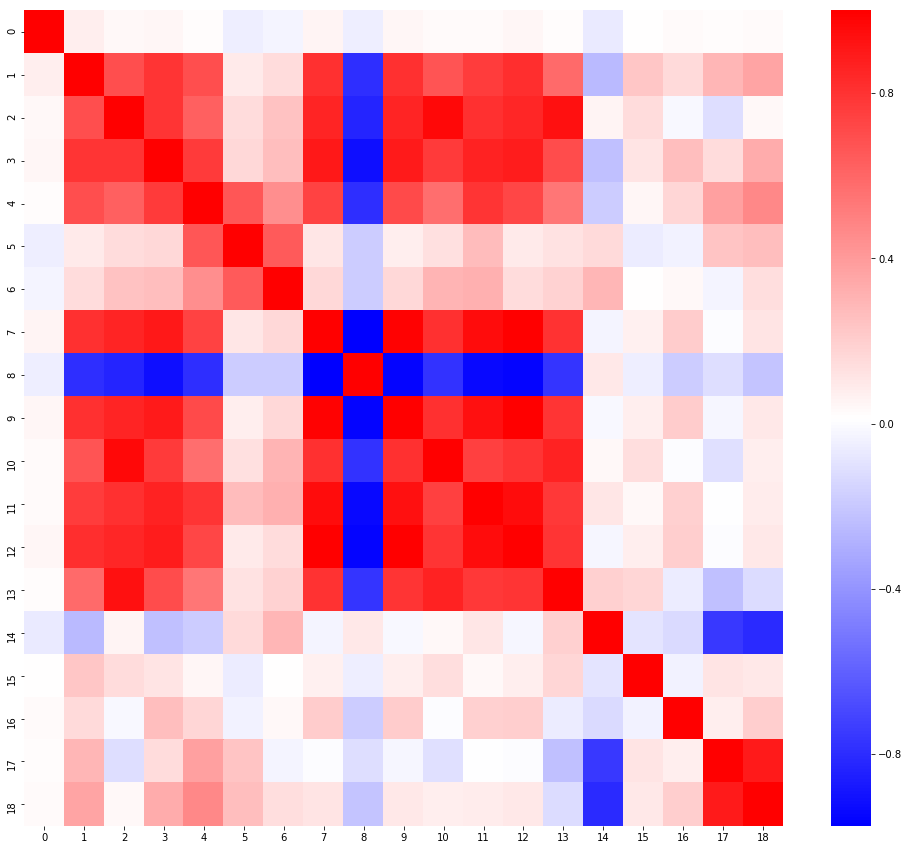

In [ ]:
corr_matrix = data_.corr()
plt.figure(figsize = (17, 15))
sns.heatmap(corr_matrix,  cmap="bwr")

*        По корреляционной матрице видно, что у нас много скореллированных признаков, что позволит нам использовать методы понижения размерности, без сильной потери в качестве предсказания.


*         Отмаштабируем признаки, т.к. при регуляризации лучше иметь отскэйленные признаки, потому что она штрафует модели за большие веса. Сделаем это в пайплайне.








#### 2.1. Базовая логистическая регрессия.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на train-датасете (е переусердствуйте с подбором, в данной работе не стоит задача найти самую оптимальную модель. Небольшого grid/random search'а хватит).

* Постройте график ROC-кривой для данного классификатора (`sklearn.metrics.roc_curve`), оцените точность классификации и f1-score. 

In [ ]:
lr_clf = LogisticRegression(multi_class = 'multinomial', solver = 'saga', max_iter = 5000, n_jobs = -1)
scaler = StandardScaler()

pipeline = Pipeline(steps = [('scaling', scaler), ('regression', lr_clf)])

pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaling', 'regression', 'scaling__copy', 'scaling__with_mean', 'scaling__with_std', 'regression__C', 'regression__class_weight', 'regression__dual', 'regression__fit_intercept', 'regression__intercept_scaling', 'regression__l1_ratio', 'regression__max_iter', 'regression__multi_class', 'regression__n_jobs', 'regression__penalty', 'regression__random_state', 'regression__solver', 'regression__tol', 'regression__verbose', 'regression__warm_start'])

In [ ]:
parameters_grid = {
    'regression__C' : np.linspace(0.01, 5, 20),
    'regression__penalty' : ['l1', 'l2']
}

grid_cv = GridSearchCV(pipeline, parameters_grid, scoring = 'accuracy', n_jobs = -1, cv = 3)

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaling',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('regression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=5000,
                                                           multi_cl

In [ ]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.7759562841530054
{'regression__C': 3.6868421052631577, 'regression__penalty': 'l1'}


In [ ]:
# code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html 

from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle




def roc_plot(estimator, X_train, y_train, X_test, y_test, tree = None):
  n_classes = 4
  # Binarize the output
  y_train_bin = label_binarize(y_train, classes=[0, 1, 2, 3])
  y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])


  clf = OneVsRestClassifier(estimator)
  
  if tree != None:
    y_score = clf.fit(X_train, y_train_bin).predict_proba(X_test)
  else:
    y_score = clf.fit(X_train, y_train_bin).decision_function(X_test)


  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])


  lw = 2

    

  # First aggregate all false positive rates
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
      mean_tpr += interp(all_fpr, fpr[i], tpr[i])

  # Finally average it and compute AUC
  mean_tpr /= n_classes


  # Plot all ROC curves
  plt.figure()

  colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'darkgreen'])
  for i, color in zip(range(n_classes), colors):
     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
               label='ROC curve of class {0} (area = {1:0.2f})'
               ''.format(i, roc_auc[i]))

  plt.plot([0, 1], [0, 1], 'k--', lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Some extension of Receiver operating characteristic to multi-class')
  plt.legend(loc="lower right")
  plt.show()

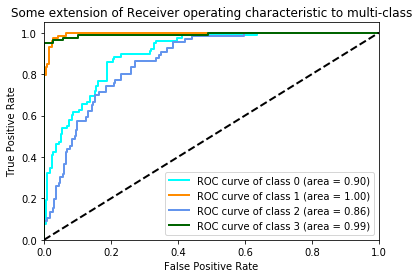

In [ ]:
roc_plot(grid_cv.best_estimator_, X_train, y_train, X_test, y_test)

In [ ]:
print('f1 - score(macro):', f1_score(y_test, grid_cv.best_estimator_.predict(X_test), average='macro')) 
print('f1 - score(micro):', f1_score(y_test, grid_cv.best_estimator_.predict(X_test), average='micro')) 
print('f1 - score(weighted):', f1_score(y_test, grid_cv.best_estimator_.predict(X_test), average='weighted')) 

f1 - score(macro): 0.8203735570670798
f1 - score(micro): 0.8282828282828283
f1 - score(weighted): 0.826631341525183


#### 2.2. Зависимость объясненной дисперсии от числа главных компонент.
Воспользуемся методом главных компонент (PCA). 

Примените его к train-части данных.
Постройте график зависимости объясненной дисперсии (explained variance ratio) от количества главных компонент.

Перед PCA обязательно надо отмаштабировать признаки, чтобы алгоритм корректно выбирал самые важные компоненты.

In [ ]:
from sklearn.decomposition import PCA

n_components = range(2, 19)

ratio = []

scaler = StandardScaler()
scaler.fit(X_train, y_train)

X_train_scaled = scaler.transform(X_train)


for n in n_components:
  pca = PCA(n_components = n)
  pca.fit(X_train_scaled) 
  ratio.append(np.sum(pca.explained_variance_ratio_))

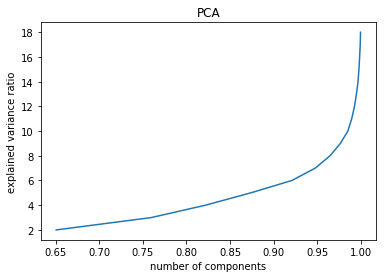

In [ ]:
plt.plot(ratio, n_components)
plt.xlabel('number of components')
plt.ylabel('explained variance ratio')
plt.title('PCA')
plt.show()

#### 2.3. Преобразование с помощью PCA.
Выберите определенное число компонент. Кратко опишите, чем обусловлен ваш выбор.

Используя эти главные компоненты, преобразуйте train и test выборки (используя методы `fit` и `transform`).

Возьмем $n = 14$ компонент, т.к. по графику видно, что с дальнейшим ростом качетво уже меняется не так быстро. При этом, мы уменьшили размерность задачи практически на $25\%$, что должно ускорить время работы.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train, y_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components = 14)

pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)



#### 2.4. Логистическая регрессия над преобразованными данными.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на преобразованном train-датасете.

* Постройте график ROC-кривой для полученных классификаторов, оцените точность классификации и f1-score. 

In [ ]:
lr_clf = LogisticRegression(multi_class = 'multinomial', solver = 'saga', max_iter = 5000, n_jobs = -1)

parameters_grid = {
    'C' : np.linspace(0.01, 5, 10),
    'penalty' : ['l1', 'l2']
}

grid_cv_pca = GridSearchCV(lr_clf, parameters_grid, scoring = 'accuracy', n_jobs = -1, cv = 3)

grid_cv_pca.fit(X_train_scaled_pca, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=5000,
                                          multi_class='multinomial', n_jobs=-1,
                                          penalty='l2', random_state=None,
                                          solver='saga', tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([0.01      , 0.56444444, 1.11888889, 1.67333333, 2.22777778,
       2.78222222, 3.33666667, 3.89111111, 4.44555556, 5.        ]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
print(grid_cv_pca.best_score_)
print(grid_cv_pca.best_params_)

0.7577413479052824
{'C': 2.7822222222222224, 'penalty': 'l2'}


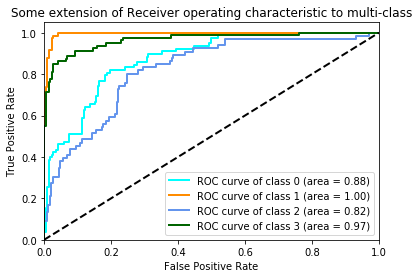

In [ ]:
roc_plot(grid_cv_pca.best_estimator_, X_train_scaled_pca, y_train, X_test_scaled_pca, y_test)

In [ ]:
print('f1 - score(macro):', f1_score(y_test, grid_cv_pca.best_estimator_.predict(X_test_scaled_pca), average='macro')) 
print('f1 - score(micro):', f1_score(y_test, grid_cv_pca.best_estimator_.predict(X_test_scaled_pca), average='micro')) 
print('f1 - score(weighted):', f1_score(y_test, grid_cv_pca.best_estimator_.predict(X_test_scaled_pca), average='weighted')) 

f1 - score(macro): 0.7714759969755237
f1 - score(micro): 0.7777777777777778
f1 - score(weighted): 0.7763456626244554


#### 2.5. Решающее дерево.
Рассмотрим поведение решающего дерева на исходных и преобразованных данных. Будем варьировать лишь один параметр - максимальную глубину дерева. 

* С помощью кросс-валидации подберите оптимальный параметр `max_depth` и оцените на исходных и преобразованных данных те же метрики, что и выше.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
parameters_grid = {
    'max_depth' : range(2, 100),
}

grid_cv_tree = GridSearchCV(tree, parameters_grid, scoring = 'accuracy', n_jobs = -1, cv = 5)


preprocessing:


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.6593806921675774
{'max_depth': 10}


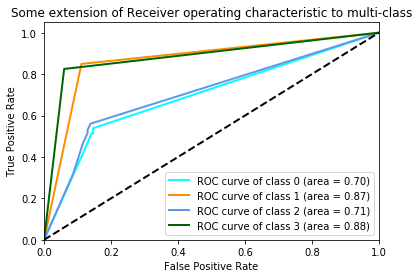

f1 - score(macro): 0.6623028477820063
f1 - score(micro): 0.6666666666666666
f1 - score(weighted): 0.6662496295011553


In [ ]:
print('preprocessing:')
grid_cv_tree.fit(X_train_scaled_pca, y_train)
print(grid_cv_tree.best_score_)
print(grid_cv_tree.best_params_)

roc_plot(grid_cv_tree.best_estimator_, X_train_scaled_pca, y_train, X_test_scaled_pca, y_test, tree = 1)

print('f1 - score(macro):', f1_score(y_test, grid_cv_tree.best_estimator_.predict(X_test_scaled_pca), average='macro')) 
print('f1 - score(micro):', f1_score(y_test, grid_cv_tree.best_estimator_.predict(X_test_scaled_pca), average='micro')) 
print('f1 - score(weighted):', f1_score(y_test, grid_cv_tree.best_estimator_.predict(X_test_scaled_pca), average='weighted')) 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


no preprocessing:
0.6812386156648452
{'max_depth': 71}


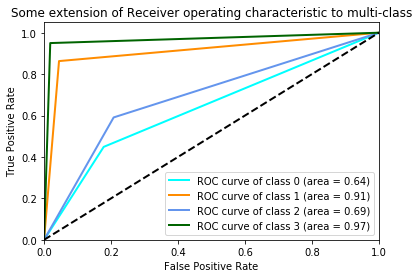

f1 - score(macro): 0.7022858796296296
f1 - score(micro): 0.7070707070707071
f1 - score(weighted): 0.708251496445941


In [ ]:
grid_cv_tree.fit(X_train, y_train)
print('no preprocessing:')
print(grid_cv_tree.best_score_)
print(grid_cv_tree.best_params_)

roc_plot(grid_cv_tree.best_estimator_, X_train, y_train, X_test, y_test, tree = 1)

print('f1 - score(macro):', f1_score(y_test, grid_cv_tree.best_estimator_.predict(X_test), average='macro')) 
print('f1 - score(micro):', f1_score(y_test, grid_cv_tree.best_estimator_.predict(X_test), average='micro')) 
print('f1 - score(weighted):', f1_score(y_test, grid_cv_tree.best_estimator_.predict(X_test), average='weighted')) 

#### 2.6. Bagging.
Перейдем к ансамблям. 

Для построения ансамбля воспользуемся Bagging'ом с числом алгоритмов от 2 до 50. В качестве первого семейства базовых алгоримтов будем использовать линейные модели (т.е. логистическую регрессию), в качестве второго - решающие деревья. 

*Пояснение: Будем строить ансамбль только из моделей из одного семейства, т.е. логистическая регрессия не смешивается с решающими деревьями.*

Для этого можно сгенерировать с помощью метода bootstrap 50 подвыборок из `train` выборки (того же размера, что и исходная), обучить логистическую регрессию и решающее дерево с оптимальными параметрами из предыдущего пункта на каждой из подвыборок и затем усреднить предсказания k моделей.

*Hint: в sklearn может найтись подходящая функция, которая облегчит вам реализацию данного пункта.*

* Постройте график качества классификации и f1-score на `train` и `test` датасетах в зависимости от числа алгоритмов, вошедших в ансамбль.

* Проанализируйте график. Какое количество моделей стоит использовать? Как вы думаете, являются ли параметры решающего дерева, подобранные в предыдущем пункте оптимальными в данном случае?

In [ ]:
from sklearn.ensemble import BaggingClassifier

f1_test_blr = []
f1_train_blr = []

for n in range(2, 50):
  bag = BaggingClassifier(base_estimator = grid_cv.best_estimator_, n_estimators = n)
  bag.fit(X_train, y_train)
  scor_test = f1_score(y_test, bag.predict(X_test), average='micro')
  #print('test: n = ' + str(n) + ' f1-score ' + str(scor_test))
  scor_train = f1_score(y_train, bag.predict(X_train), average='micro')
  #print('test: n = ' + str(n) + ' f1-score ' + str(scor_train)) 
  f1_test_blr.append(scor_test)
  f1_train_blr.append(scor_train)

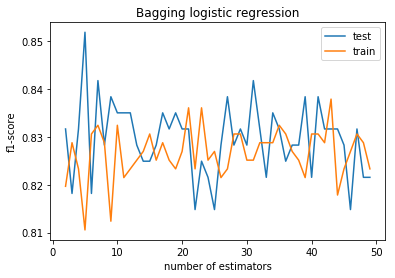

In [ ]:
plt.plot(range(2, 50), f1_test_blr, label = 'test')
plt.plot(range(2, 50), f1_train_blr, label = 'train')
plt.xlabel('number of estimators')
plt.ylabel('f1-score')
plt.title('Bagging logistic regression')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import BaggingClassifier

f1_test_bt = []
f1_train_bt = []

for n in range(2, 50):
  bag = BaggingClassifier(base_estimator = grid_cv_tree.best_estimator_, n_estimators = n)
  bag.fit(X_train, y_train)
  scor_test = f1_score(y_test, bag.predict(X_test), average='micro')
  print('test: n = ' + str(n) + ' f1-score ' + str(scor_test))
  scor_train = f1_score(y_train, bag.predict(X_train), average='micro')
  print('train: n = ' + str(n) + ' f1-score ' + str(scor_train)) 
  f1_test_bt.append(scor_test)
  f1_train_bt.append(scor_train)

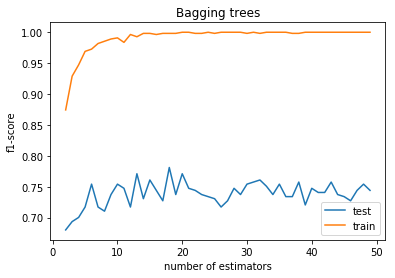

In [ ]:
plt.plot(range(2, 50), f1_test_bt, label = 'test')
plt.plot(range(2, 50), f1_train_bt, label = 'train')
plt.xlabel('number of estimators')
plt.ylabel('f1-score')
plt.legend()
plt.title('Bagging trees')
plt.show()



*   Стоит использовать такое число моделей, которое дает наилучший результат. Но при этом стоит учитывать, что время работы логистической регрессии растет с увелиением числа подвыборок, поэтому лучше взять $n$ поменьше, и тем самым найти баланс между временем работы и качетвом предсказания.
*   Параметрам, полученным на кросс-валидации можно доверять. Все-таки мы их получили, изучив несколько подвыборок исходных данных, поэтому и для бэггинга эти параметры близки к оптимальным.



#### 2.7. Random Forest.
Теперь воспользуйтесь `sklearn`-реализацией алгоритма Random Forest. 

* Постройте аналогичные графики для него (изменяя число деревьев от 1 до 50). Остальные параметры можно оставить по умолчанию.

* Проанализируйте полученные результаты. Каким получилось оптимальное число деревьев. Как оно соотносится с оптимальным числом деревьев и линейных моделей в bagging'е из предыдущего пункта?

In [ ]:
from sklearn.ensemble import RandomForestClassifier


f1_test_rf =[]
f1_train_rf = []

for n in range(1, 51):
  clf = RandomForestClassifier(n_estimators = n)
  clf.fit(X_train, y_train)
  scor_test = f1_score(y_test, clf.predict(X_test), average='micro')
  #print('test: n = ' + str(n) + ' f1-score ' + str(scor_test))
  scor_train = f1_score(y_train, clf.predict(X_train), average='micro')
  #print('train: n = ' + str(n) + ' f1-score ' + str(scor_train)) 
  f1_test_rf.append(scor_test)
  f1_train_rf.append(scor_train)
  
  

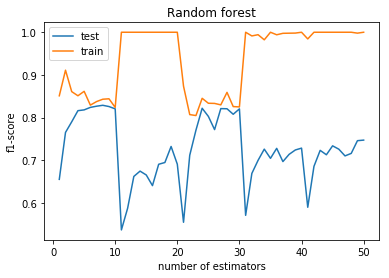

In [ ]:
plt.plot(range(1, 51), f1_test, label = 'test')
plt.plot(range(1, 51), f1_train, label = 'train')
plt.xlabel('number of estimators')
plt.ylabel('f1-score')
plt.title('Random forest')
plt.legend()
plt.show()

#### 2.8. Кривая обучения.
* Поделите обучающую выборку на 10 примерно равных частей. Обучите логистическую регрессию (с оптимальными параметрами), решающее дерево (аналогично), бэггинг над логистическими регрессиями и решающими деревьями (с выбранными параметрами) и RandomForest (из предыдущего пункта) на одной, двух, трех и т.д. частях.

* Постройти график f1-score и accuracy на `train` и `test` датасетах в зависимости от размера обучающей выборки.

* Проанализируйте полученный график. Можно ли сделать из него какие-либо выводы? Если да - кратко опишите их.

In [ ]:
from sklearn.metrics import accuracy_score

f1_test = []
f1_train = []
acc_test = []
acc_train = []


lr = grid_cv.best_estimator_
tree = grid_cv_tree.best_estimator_
bag_lr = BaggingClassifier(base_estimator = grid_cv.best_estimator_, n_estimators = np.argmax(f1_test_blr))
bag_tr = BaggingClassifier(base_estimator = grid_cv_tree.best_estimator_, n_estimators = np.argmax(f1_test_bt))
rf = RandomForestClassifier(n_estimators = np.argmax(f1_test_rf))

clfs = [lr, tree, bag_lr, bag_tr, rf]

train = []

for clf in clfs:
  for i in range(9):
    X_split = X_train[: (i+1) * ceil(X_train.shape[0] / 10)]
    y_split = y_train[: (i+1) * ceil(X_train.shape[0] / 10)]
    clf.fit(X_split, y_split)
    scor_test = f1_score(y_test, clf.predict(X_test), average='macro')
    scor_train = f1_score(y_split, clf.predict(X_split), average='macro')
    f1_test.append(scor_test)
    f1_train.append(scor_train)
    accuracy_test = accuracy_score(y_test, clf.predict(X_test))
    accuracy_train = accuracy_score(y_split, clf.predict(X_split))
    acc_test.append(accuracy_test)
    acc_train.append(accuracy_train)
    
  clf.fit(X_train, y_train)
  scor_test = f1_score(y_test, clf.predict(X_test), average='macro')
  scor_train = f1_score(y_train, clf.predict(X_train), average='macro')
  f1_test.append(scor_test)
  f1_train.append(scor_train)
  accuracy_test = accuracy_score(y_test, clf.predict(X_test))
  accuracy_train = accuracy_score(y_train, clf.predict(X_train))
  acc_test.append(accuracy_test)
  acc_train.append(accuracy_train)  

In [ ]:
print(f1_test)
print(f1_train)
print(acc_test)
print(acc_train)

[0.6551486636207592, 0.7651369481903834, 0.790061242109209, 0.8161536913256286, 0.8179840719146794, 0.8238516093601209, 0.8266268005840995, 0.8287610664257801, 0.8258328368369032, 0.8203735570670798, 0.5366127713212772, 0.5873914549263415, 0.6619820493409472, 0.6744520211754892, 0.6654130077818234, 0.6404355763248097, 0.6905316905316906, 0.694630492830458, 0.7322403241977942, 0.6906530001120536, 0.5545531370038412, 0.7116428164849868, 0.7704179943160216, 0.8218199629247376, 0.8027513399749922, 0.7717883615741676, 0.8209790096132801, 0.8206149820646638, 0.8077166452166452, 0.8203422110139871, 0.5707880923896056, 0.6690116075552559, 0.6997097526293218, 0.725982395107437, 0.7044198253437384, 0.727844735909252, 0.6968040598317078, 0.7137549052594143, 0.7239978451013229, 0.7283590209539194, 0.5897087055959549, 0.6856694941899237, 0.7231066037068736, 0.7127909397494535, 0.7337081506892827, 0.7258892511671914, 0.7101141339345348, 0.7160020622999261, 0.7458100718266252, 0.7471177944206882]
[0.

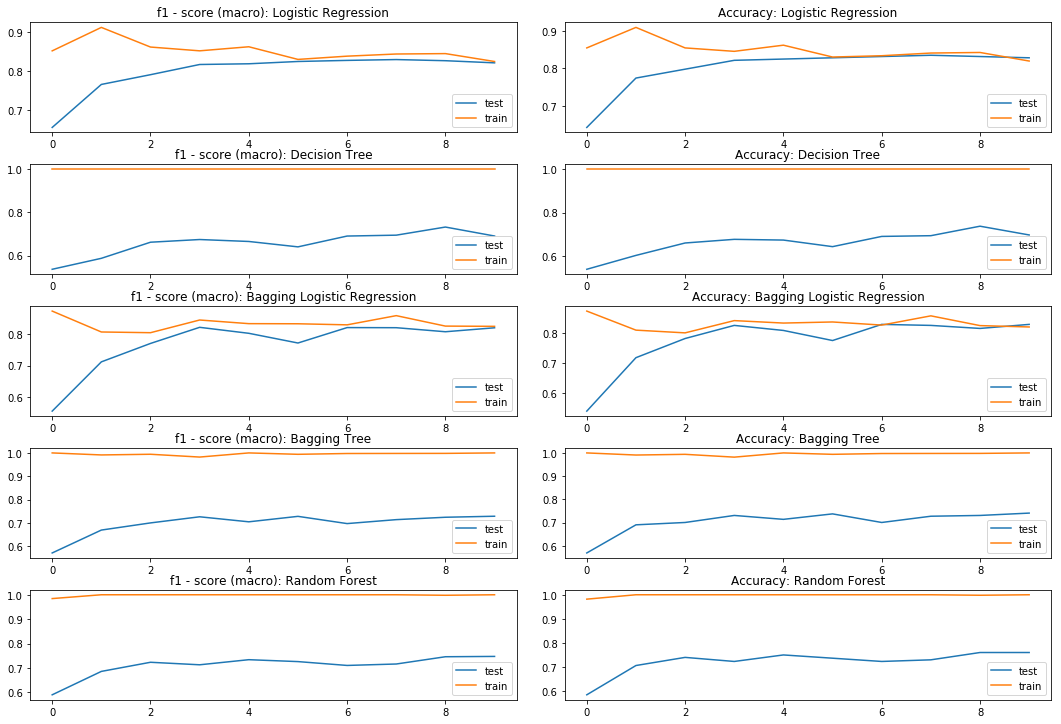

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(15,10))
fig.tight_layout()

clfs_names = ['Logistic Regression', 'Decision Tree', 'Bagging Logistic Regression', 'Bagging Tree', 'Random Forest']

for i in range(5):
  axes[i, 0].set_title('f1 - score (macro): ' + str(clfs_names[i]))
  axes[i, 0].plot(f1_test[10*i: 10*(i+1)], label = 'test')
  axes[i, 0].plot(f1_train[10*i: 10*(i+1)], label = 'train')
  axes[i, 0].legend()
  axes[i, 1].set_title('Accuracy: ' + str(clfs_names[i]))
  axes[i, 1].plot(acc_test[10*i: 10*(i+1)], label = 'test')
  axes[i, 1].plot(acc_train[10*i: 10*(i+1)], label = 'train')
  axes[i, 1].legend()



*   f1-score (micro) и accuracy -- одно и то же, поэтому посмтроим f1-score (macro)
*   Деревья и ансамбли с их участием плохо справляются с задачей, скорее всего данные плохо раделяются гиперплоскостями, параллельными осям координат
*   Логистическа регрессия и бэггинг с ней лучше всего решают задачу.